# **Handwritten Digits Recognition using Neural Networks**

This Jupyter Notebook demonstrates the process of recognizing handwritten digits using a neural network model. The dataset used is the `digits` dataset from `sklearn.datasets`. The workflow includes loading the dataset, visualizing the images, preprocessing the data, building and training a neural network model using TensorFlow, and evaluating the model's performance.

## Variables in the Notebook

- **X**: numpy.ndarray, shape (1797, 8, 8)
- **X_flattened**: numpy.ndarray, shape (1797, 64)
- **X_reshaped**: numpy.ndarray, shape (1797, 64)
- **X_test**: numpy.ndarray, shape (360, 64)
- **X_train**: numpy.ndarray, shape (1437, 64)
- **X_train_reshaped**: numpy.ndarray, shape (1437, 64)
- **ax**: numpy.ndarray, shape (5, 5)
- **digits**: sklearn.utils._bunch.Bunch
- **fig**: matplotlib.figure.Figure
- **history**: keras.src.callbacks.history.History
- **i**: int, value 24
- **img_test**: numpy.ndarray, shape (1, 64)
- **model**: keras.src.models.sequential.Sequential
- **predictions**: numpy.ndarray, shape (1, 10)
- **y**: numpy.ndarray, shape (1797,)
- **y_test**: numpy.ndarray, shape (360,)
- **y_train**: numpy.ndarray, shape (1437,)

### Importing the dataset

In [22]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

### Exploring dataset's columns

In [23]:
digits = load_digits()

dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

### Dataset Overview

The dataset used in this notebook is the `digits` dataset from `sklearn.datasets`. It contains images of handwritten digits and their corresponding target labels. Below is an example of an image matrix, its target number, and the shape of the entire dataset.

In [24]:
print(f"image matrix:\n {digits.images[0]}\n")
print(f"its target number: {digits.target_names[0]}\n")
print(f"matrix shape: {digits.images.shape}")

image matrix:
 [[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]

its target number: 0

matrix shape: (1797, 8, 8)


### Visualizing the First 25 Images

The following plot displays the first 25 images from the `digits` dataset along with their corresponding target labels. Each subplot represents one image of a handwritten digit.

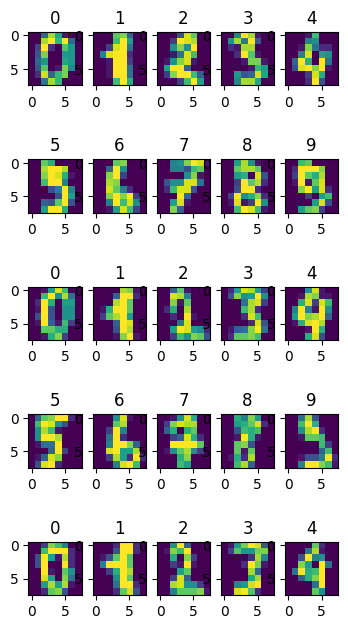

In [25]:
fig,ax = plt.subplots(5,5,figsize=(4,8))
for i in range(25):
    ax[i//5,i%5].imshow(digits.images[i])
    ax[i//5,i%5].set_title(digits.target[i])


### Splitting the Dataset

The dataset is split into training and testing sets using the `train_test_split` function from `sklearn.model_selection`. The images are normalized by dividing by 16.0, and then flattened into a 1D array. The target labels are also split accordingly.

In [32]:
from sklearn.model_selection import train_test_split

X = digits.images / 16.0
X_flattened = X.reshape(-1, 64)
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X_flattened, y, test_size=0.2)

### Building the Neural Network Model

In this section, we define and build a neural network model using TensorFlow's Keras API. The model consists of an input layer, three hidden layers with ReLU activation, and an output layer with softmax activation. The model summary provides an overview of the layers and the number of parameters.

In [75]:
import tensorflow as tf


model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(64,)),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 256)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,442 (228.29 KB)

 Trainable params: 58,442 (228.29 KB)

 Non-trainable params: 0 (0.00 B)

### Compiling the Neural Network Model

The neural network model is compiled using the `compile` method. The loss function used is `sparse_categorical_crossentropy`, which is suitable for multi-class classification problems. The optimizer used is Adam with a learning rate of 0.001, and the model's performance is evaluated using the accuracy metric.

In [76]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

### Training the Neural Network Model

The neural network model is trained using the `fit` method. The training data (`X_train` and `y_train`) is split into training and validation sets with a validation split of 20%. The model is trained for 50 epochs with a batch size of 16. The training history is stored in the `history` variable.

In [77]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16
)

Epoch 1/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5171 - loss: 1.7472 - val_accuracy: 0.8854 - val_loss: 0.3992
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9341 - loss: 0.2608 - val_accuracy: 0.9271 - val_loss: 0.2185
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9542 - loss: 0.1494 - val_accuracy: 0.9653 - val_loss: 0.1246
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9770 - loss: 0.0904 - val_accuracy: 0.9444 - val_loss: 0.1895
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9754 - loss: 0.0870 - val_accuracy: 0.9688 - val_loss: 0.0959
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9895 - loss: 0.0403 - val_accuracy: 0.9722 - val_loss: 0.0893
Epoch 7/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9948 - loss: 0.0319 - val_accuracy: 0.9722 - val_loss: 0.0826
Epoch 8/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9980 - loss: 0.0166 - val_accuracy: 0.9688 - val_loss:

### Evaluating the Neural Network Model

The neural network model is evaluated using the `evaluate` method on the test data (`X_test` and `y_test`). This method returns the loss value and metrics specified during the compilation of the model. The test data is reshaped to match the input shape expected by the model.

In [78]:
model.evaluate(X_test.flatten().reshape(360,64),y_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9662 - loss: 0.1547  


[0.11726547032594681, 0.9777777791023254]

### Predicting a Single Image

In this section, we visualize a single image from the `digits` dataset and use the trained neural network model to predict the digit. The predicted digit is compared with the actual target label to evaluate the model's performance on this specific example.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
predicted number: 2
real number: 2


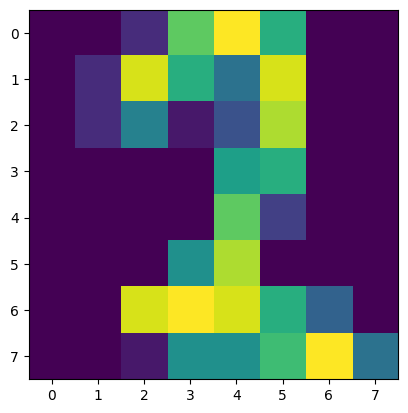

In [79]:
plt.imshow(digits.images[1289])

img_test = digits.images[1289].reshape(1,64)
print(f"predicted number: {model.predict(img_test).argmax()}")

print(f"real number: {digits.target[1289]}")

### Conclusion

In this notebook, we successfully demonstrated the process of recognizing handwritten digits using a neural network model. We utilized the `digits` dataset from `sklearn.datasets`, which contains images of handwritten digits and their corresponding target labels. The workflow included:

1. Loading and exploring the dataset.
2. Visualizing the first 25 images from the dataset.
3. Splitting the dataset into training and testing sets.
4. Building and training a neural network model using TensorFlow's Keras API.
5. Evaluating the model's performance on the test data.
6. Predicting a single image and comparing the predicted digit with the actual target label.

The neural network model achieved a satisfactory level of accuracy, demonstrating its effectiveness in recognizing handwritten digits. This notebook serves as a practical example of how to implement and train a neural network for image classification tasks.